# Projet de Modélisation et Machine Learning - Diagramme HR

## 1) Détermination du type de problème

### 1.1 - Nature du problème

Nous avons un ensemble de données sans labels prédéfinis :nous ne savons pas à l’avance quelles étoiles appartiennent à quel groupe.

Type de problème : Clustering (apprentissage non supervisé)

Objectif : Identifier des regroupements d’étoiles dans le diagramme HR .

### 1.2 - Sélection des modèles 

- **K-Means** : \
Les clusters doivent avoir les mêmes formes et tailles (ce qui pourrait poser problème). \
Nécessite de choisir à l'avance le nombre de clusters.

- **DBSCAN** (Density-based Spatial Clustering of Applications with Noise) : \
Les clusters peuvent être de formes et tailles différentes 

- **Gaussian mixture models** (GMM) : \
Les clusters peuvent être de formes et tailles différentes


### 1.3 - Choix de la métrique pour évaluer les modèles

- Matrice de confusion
- Accuracy 
- Precision 
- Recall 
- F1-score
- Balanced-accurary 

## 2) Pré-traitement des données 

In [1]:
### 2.0 - Importation des modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### 2.1 - Chargement des données

In [2]:
data = pd.read_csv("data.csv")
print(data.head())
print(data.shape)

  Catalog  HIP Proxy        RAhms        DEdms  Vmag  VarFlag r_Vmag  \
0       H    1   NaN  00 00 00.22  +01 05 20.4  9.10      NaN      H   
1       H    2   NaN  00 00 00.91  -19 29 55.8  9.27      NaN      G   
2       H    3   NaN  00 00 01.20  +38 51 33.4  6.61      NaN      G   
3       H    4   NaN  00 00 02.01  -51 53 36.8  8.06      NaN      H   
4       H    5   NaN  00 00 02.39  -40 35 28.4  8.55      NaN      H   

      RAdeg      DEdeg  ... Survey  Chart  Notes        HD         BD  \
0  0.000912   1.089013  ...      S    NaN    NaN  224700.0  B+00 5077   
1  0.003797 -19.498837  ...    NaN    NaN    NaN  224690.0  B-20 6688   
2  0.005008  38.859286  ...      S    NaN    NaN  224699.0  B+38 5108   
3  0.008382 -51.893546  ...      S    NaN    NaN  224707.0        NaN   
4  0.009965 -40.591224  ...    NaN    NaN    NaN  224705.0        NaN   

          CoD         CPD  (V-I)red  SpType  r_SpType  
0         NaN         NaN      0.66      F5         S  
1         NaN   

Le dataset est constituées de données sur 118 218 étoiles et de 78 colonnes. Plusieurs de ces colonnes ne nous seront pas utiles.

### 2.2 - Visualisation des données

In [3]:
# Types de chaque colonne
print(data.dtypes)

Catalog      object
HIP           int64
Proxy        object
RAhms        object
DEdms        object
             ...   
CoD          object
CPD          object
(V-I)red    float64
SpType       object
r_SpType     object
Length: 78, dtype: object


                HIP      Vmag   VarFlag     RAdeg     DEdeg       Plx  \
HIP        1.000000  0.003751  0.022815  0.999513 -0.003517 -0.002868   
Vmag       0.003751  1.000000  0.441254  0.002829 -0.007384 -0.054949   
VarFlag    0.022815  0.441254  1.000000  0.022740  0.020087 -0.087664   
RAdeg      0.999513  0.002829  0.022740  1.000000 -0.003610 -0.003073   
DEdeg     -0.003517 -0.007384  0.020087 -0.003610  1.000000  0.001103   
Plx       -0.002868 -0.054949 -0.087664 -0.003073  0.001103  1.000000   
pmRA      -0.032329 -0.001165  0.008165 -0.032885  0.001581  0.008910   
pmDE      -0.012362 -0.051399  0.002665 -0.012239 -0.013896 -0.209806   
e_RAdeg    0.005589  0.186133  0.219122  0.004837 -0.006926  0.078872   
e_DEdeg    0.005067  0.187942  0.222543  0.004202 -0.010726  0.074768   
e_Plx      0.003545  0.324266  0.234460  0.002937 -0.009046  0.118504   
e_pmRA     0.007956  0.260811  0.212447  0.007012 -0.007746  0.114305   
e_pmDE    -0.000127  0.278234  0.236816 -0.001111 -

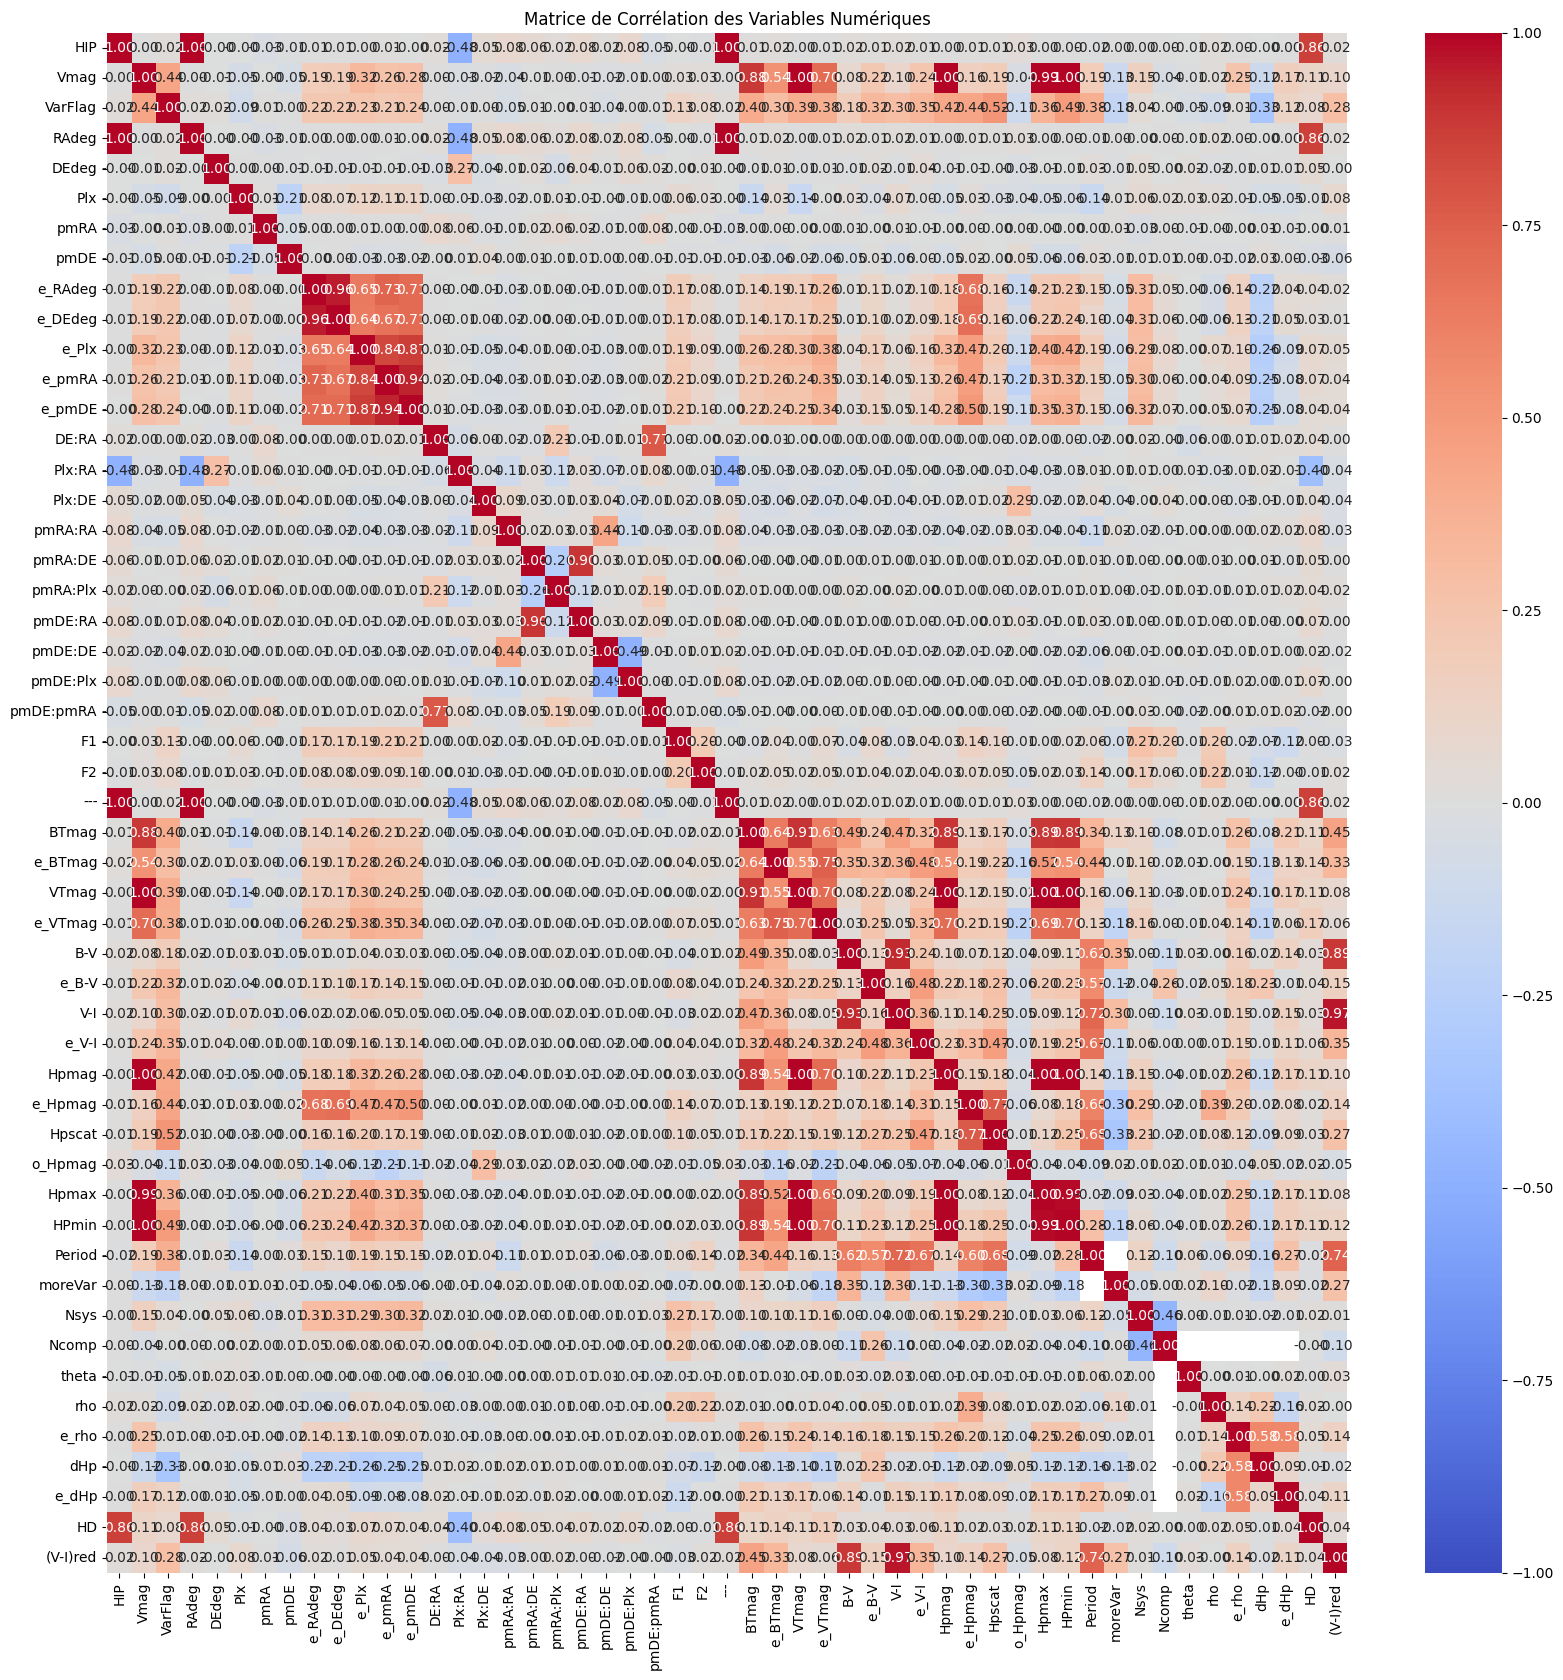

In [4]:
# Extraire seulement les données numériques
num_data = data.select_dtypes(include=['number'])

# Matrice de corrélation
corr_matrix = num_data.corr()
print(corr_matrix)

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()

           HIP      Vmag       Plx       B-V
HIP   1.000000  0.003751 -0.002868  0.018040
Vmag  0.003751  1.000000 -0.054949  0.076026
Plx  -0.002868 -0.054949  1.000000  0.029421
B-V   0.018040  0.076026  0.029421  1.000000


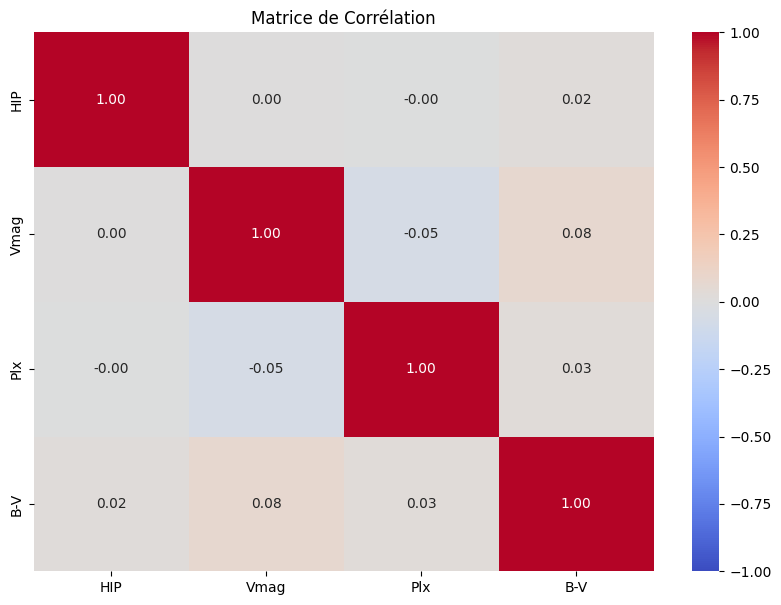

In [5]:
# Extraire quelques données qui semblent être pertinentes (pour une meilleure visualisation)

def matrice_corr(sub_data_name, data) :
    num_data = data.select_dtypes(include=['number'])
    sub_data = num_data[sub_data_name]
    corr_matrix_sub = sub_data.corr()
    print(corr_matrix_sub)

    plt.figure(figsize=(10, 7))
    sns.heatmap(corr_matrix_sub, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
    plt.title("Matrice de Corrélation")
    plt.show()

matrice_corr(['HIP', 'Vmag', 'Plx', 'B-V'], data)  ## un peu de la triche d'isoler déjà les variables cibles



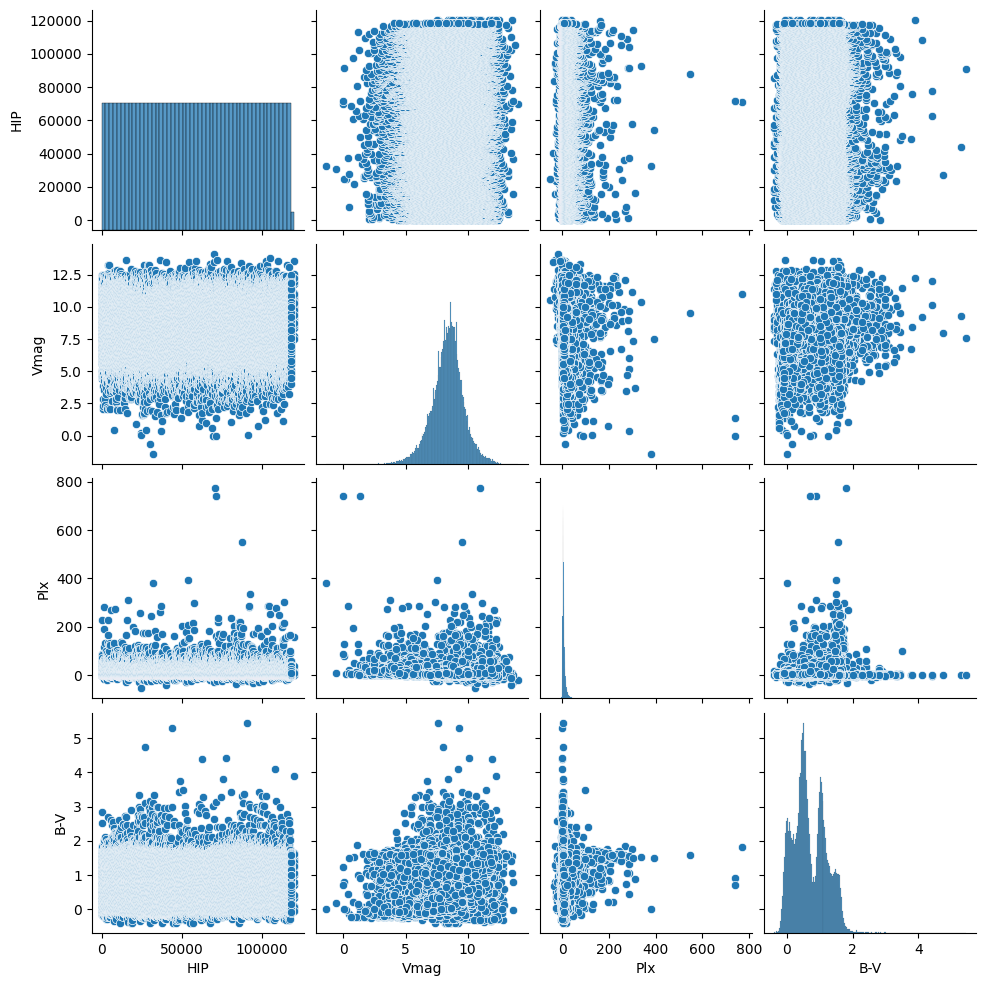

In [6]:
data_sub = data[['HIP', 'Vmag', 'Plx', 'B-V']]
sns.pairplot(data=data_sub)  # ?????

### 2.3 - Traitement des données manquantes

In [11]:
# Vérfifier les valeurs manquantes 
nb_missing_value = data.isnull().sum()    # Nombre de valeurs manquantes par colonne
print(nb_missing_value)


Catalog          0
HIP              0
Proxy       107293
RAhms            0
DEdms            0
             ...  
CoD          90338
CPD          77968
(V-I)red         0
SpType        3034
r_SpType      3034
Length: 78, dtype: int64 -------
Catalog      0.000000
HIP          0.000000
Proxy       90.758599
RAhms        0.000000
DEdms        0.000000
              ...    
CoD         76.416451
CPD         65.952731
(V-I)red     0.000000
SpType       2.566445
r_SpType     2.566445
Length: 78, dtype: float64


In [13]:
# Afficher le pourcentage de valeurs manquantes
missing_percent = data.isnull().mean() * 100
print(missing_percent)

Catalog      0.000000
HIP          0.000000
Proxy       90.758599
RAhms        0.000000
DEdms        0.000000
              ...    
CoD         76.416451
CPD         65.952731
(V-I)red     0.000000
SpType       2.566445
r_SpType     2.566445
Length: 78, dtype: float64


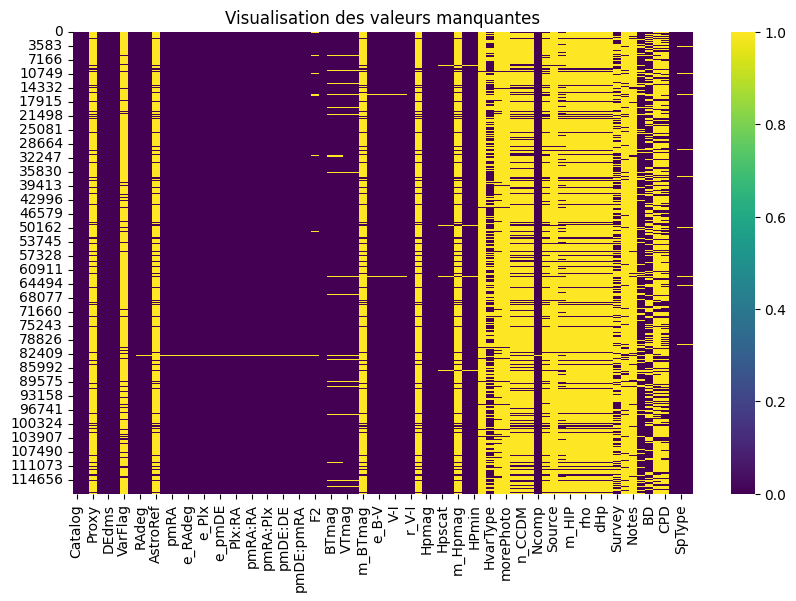

In [19]:
# Heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

Les valeurs manquantes sont représentées ci-dessus par du jaune, on évitera alors d'utiliser les colonnes si avec trop de valeurs manquantes.

In [ ]:
# Traiter les valeurs manquantes


### 